In [1]:
import pandas as pd
import numpy as np
import os

#### Task1:  Merging 12 monts of sales dataset into single DataSet

In [3]:
# df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
# print(files)
all_months_data.to_csv("all_data.csv", index=False)
# print(all_months_data.head())


### Cleanup the data!

#### Dropping rows of NaN

In [2]:
all_data = pd.read_csv("all_data.csv")

In [3]:

nan_data = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how="all")


#### Removing 'Or'

In [4]:

# all_data.head(50)
# temp_data = all_data[all_data['Or']]

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

# temp_data['Order Date'].str[0:2]
# temp_data = temp_data.drop('Month', axis=1)


### Adding new columns to DataFrame

#### Task2: Add month column

In [5]:
# all_data['Month'] = all_data['Order Date'].str([0:2])
# all_data['Order Date'].isna()
if 'Month' in all_data.columns:
    all_data = all_data.drop('Month', axis=1)

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [11]:
# new_data = temp_data

In [6]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int32') * all_data['Price Each'].astype('float')
# new_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


#### Q1. What is the best month for sales? How much was earned that month?

In [7]:
result = all_data.groupby('Month').sum()

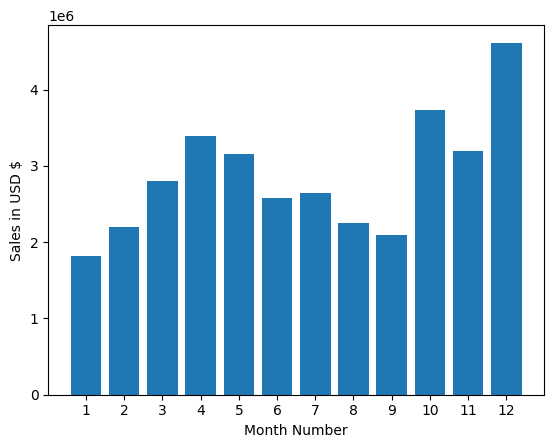

In [8]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD $")
plt.xlabel("Month Number")
plt.show()

#### Question 2: Which city has the biggest sales?

In [9]:
all_data['City'] = all_data['Purchase Address'].str.split(",", expand=True)[1]

In [18]:
## For finding NaN values in City column

# new_data['City'].isna()
all_data[all_data['City'].isna()].index.tolist()

[]

In [10]:
result_city = all_data.groupby('City').sum()

In [ ]:
# result_city.head()
# [new_data['City'].unique() for 'City' in new_data.columns]

pd.Series({c: new_data['City'].unique() for c in new_data['City']})



In [120]:
import math

result_city['Sales'].max()


range(0,math.ceil(result_city['Sales'].max()))
# result_city['Sales'].idxmax()

range(0, 8262204)

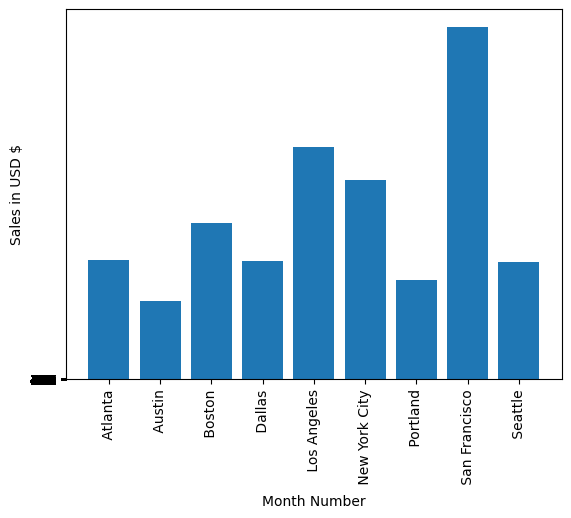

In [13]:
cities = [city for city, df in all_data.groupby('City')]
# sales_count = range(0,math.ceil(result_city['Sales'].max()))
sales_count = range(0,500)
plt.bar(cities, result_city['Sales'])
plt.xticks(cities, rotation="vertical")
plt.yticks(sales_count)
plt.ylabel("Sales in USD $")
plt.xlabel("Month Number")
plt.show()

#### Question 3: At what time should we display ads to maximize the customer's buying product?

In [16]:

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [17]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City,9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,10,3
2,278799,Apple Airpods Headphones,1,150.0,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston,13,56


Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

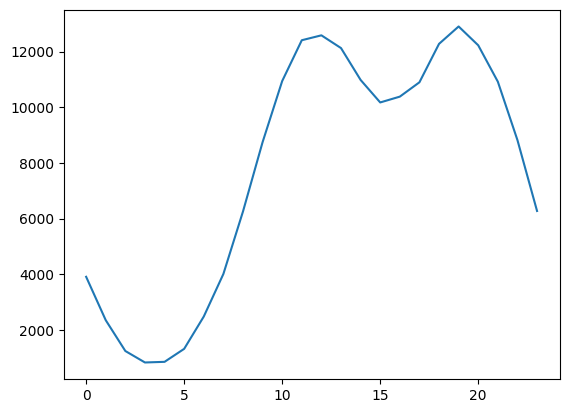

In [18]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count()['Sales'])
all_data.groupby('Hour').count()['Sales']
# hours

#### Question 4: What products are most often sold together?

In [94]:
# products_data = all_data.groupby('Order ID').sum()
# all_data.loc[:, all_data.columns != "Order Date"].groupby('Order ID').sum()
# dupe = None
dupe = all_data[all_data['Order ID'].duplicated(keep=False)]

# if 'Grouped Products' in dupe.columns:
#     print("dropped")
    
# # dupe.columns
# dupe['Grouped Products'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# dupe = dupe[['Order ID', 'Grouped Products']].drop_duplicates()



In [97]:
dupe.head
# all_data.head

<bound method NDFrame.head of        Order ID                     Product Quantity Ordered Price Each   
9        278806  Bose SoundSport Headphones                1      99.99  \
10       278806             ThinkPad Laptop                1     999.99   
15       278811            Wired Headphones                1      11.99   
16       278811    Apple Airpods Headphones                1      150.0   
24       278819                      iPhone                1      700.0   
...         ...                         ...              ...        ...   
186756   278706        USB-C Charging Cable                1      11.95   
186760   278710        USB-C Charging Cable                1      11.95   
186761   278710            27in FHD Monitor                1     149.99   
186769   278718        USB-C Charging Cable                1      11.95   
186770   278718  Bose SoundSport Headphones                1      99.99   

                Order Date                       Purchase Address  Mo

In [78]:
from itertools import combinations
from collections import Counter

In [93]:
count = Counter()

for row in dupe['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]
